# Abstract:

The TMNIST dataset represents a comprehensive collection of typographic character images designed to facilitate advanced research in machine learning and computer vision, with a specific focus on font and character recognition. This dataset, inspired by the structure of the well-known MNIST database, comprises 29,900 labeled images of typographic characters spanning a wide array of fonts, styles, and weights. Each image is a grayscale, 28x28 pixel representation, making it immediately compatible with algorithms and models developed for MNIST, thus allowing for straightforward benchmarking and comparison.

Unique to TMNIST is its emphasis on typographic diversity, encompassing both common and rare fonts, which presents a novel challenge to the domain of text and character recognition—bridging the gap between traditional handwritten digit recognition and the broader, more complex task of font and style identification. This dataset not only serves as a valuable resource for developing and testing algorithms in optical character recognition (OCR), style classification, and font generation but also provides a fertile ground for exploring machine learning techniques in unsupervised learning, generative models, and domain adaptation.


**Dataset**

names: This column contains the names of the fonts or styles for each typographic character image. It is a categorical feature that provides the textual representation of the font family from which the character is drawn. This can be useful for tasks such as font recognition or categorization.

labels: Represents the class labels for each image. In the context of the TMNIST dataset, this could correspond to the specific character or numeral that the image represents. For instance, in a traditional MNIST dataset, this would be a digit between 0 and 9. The exact nature of the labels (e.g., alphanumeric characters, special symbols) depends on the dataset's scope.

1 to 784: These columns represent the pixel values of the 28x28 pixel grayscale images of the typographic characters, flattened into a 1D array. Each column corresponds to one pixel in the image, with column names indicating the pixel index. The values in these columns are typically integers between 0 and 255, indicating the grayscale intensity of each pixel, with 0 representing black and 255 white.

# Importing Important Libraries

In [1]:
#Importing required libraries
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2024-04-10 01:53:06.588707: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 01:53:06.588873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 01:53:06.773006: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [39]:
import pandas as pd
df= pd.read_csv('/kaggle/input/tmnist-typeface-mnist/TMNIST_Data.csv')

In [40]:
df.shape

(29900, 786)

In [6]:
df.columns.max()

'names'

In [7]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Get the number of unique values in the "label" column
print("Number of unique labels:", df['labels'].nunique())


# to get the total unique numbers in the dataset
print("Unique labels:")
df.labels.value_counts()

Number of unique labels: 10

Unique labels:


labels
2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: count, dtype: int64

# Initializing Tensorflow 

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize

# Extract features and labels
X = df.drop(columns=['names', 'labels']).values
y = df['labels'].values

# Normalize the features to be between 0 and 1
X_normalized = normalize(X, axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Reshape the features for the neural network (28x28 pixels with 1 color channel)
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23920, 28, 28, 1), (5980, 28, 28, 1), (23920,), (5980,))

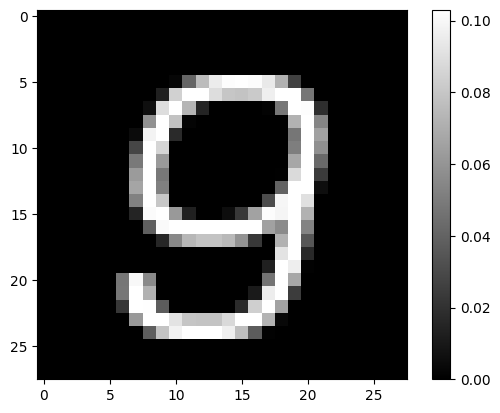

In [ ]:
sample_image = X_train[0].reshape(28, 28)

plt.imshow(sample_image, cmap='gray')
plt.colorbar()  # Adds a color bar to indicate the scale
plt.show()

**Convolutional Neural Networks (CNNs)** are a class of deep neural networks that are particularly powerful for tasks involving spatial data, such as image and video recognition. The mathematical concepts and operations underlying CNNs are key to their ability to efficiently learn from high-dimensional data. Below, we delve into the foundational elements of CNNs, including convolution operations, activation functions, pooling, and the principles that govern their learning process.

1. Convolution Operation
The heart of a CNN is the convolution operation, which applies a filter (or kernel) to an input image to produce a feature map. This operation highlights patterns in the image, such as edges or textures, depending on the filter's weights.

2. Activation Functions
After convolution, an activation function is applied to introduce non-linearity, enabling the network to learn complex patterns.

ReLU (Rectified Linear Unit): The most commonly used activation function in CNNs is ReLU, defined as:
ReLU
(
x
)
=
max
⁡
(
0
,
x
)
ReLU(x)=max(0,x)
This function retains only positive values, turning all negative values to zero, which helps in reducing the vanishing gradient problem and speeds up training.
3. Pooling
Pooling layers reduce the spatial dimensions (width and height) of the input volume for the next convolution layer. It helps in making the detection of features invariant to scale and orientation changes.

Max Pooling: Selects the maximum element from the region of the feature map covered by the filter. For a 2x2 filter, the operation can be simplified as:
P
i
j
=
max
⁡
(
elements within the
2
x
2
 region
)
P
ij
​
 =max(elements within the 2x2 region)
4. Fully Connected Layers
After several convolution and pooling layers, the high-level reasoning in the neural network is done through fully connected layers. They combine all features for the final classification or regression task.

5. Backpropagation and Learning
CNNs are trained using backpropagation, which efficiently computes gradients of the loss function with respect to all weights in the network.



6. Conceptual Framework
Feature Hierarchy: CNNs automatically learn and hierarchically organize features. Lower layers capture basic features like edges and textures, while higher layers combine these into more abstract concepts, such as parts of objects or entire objects.
Weight Sharing and Spatial Hierarchy: The convolution operation uses the same filter across the entire input, which significantly reduces the number of parameters and reflects the spatial hierarchy in images.


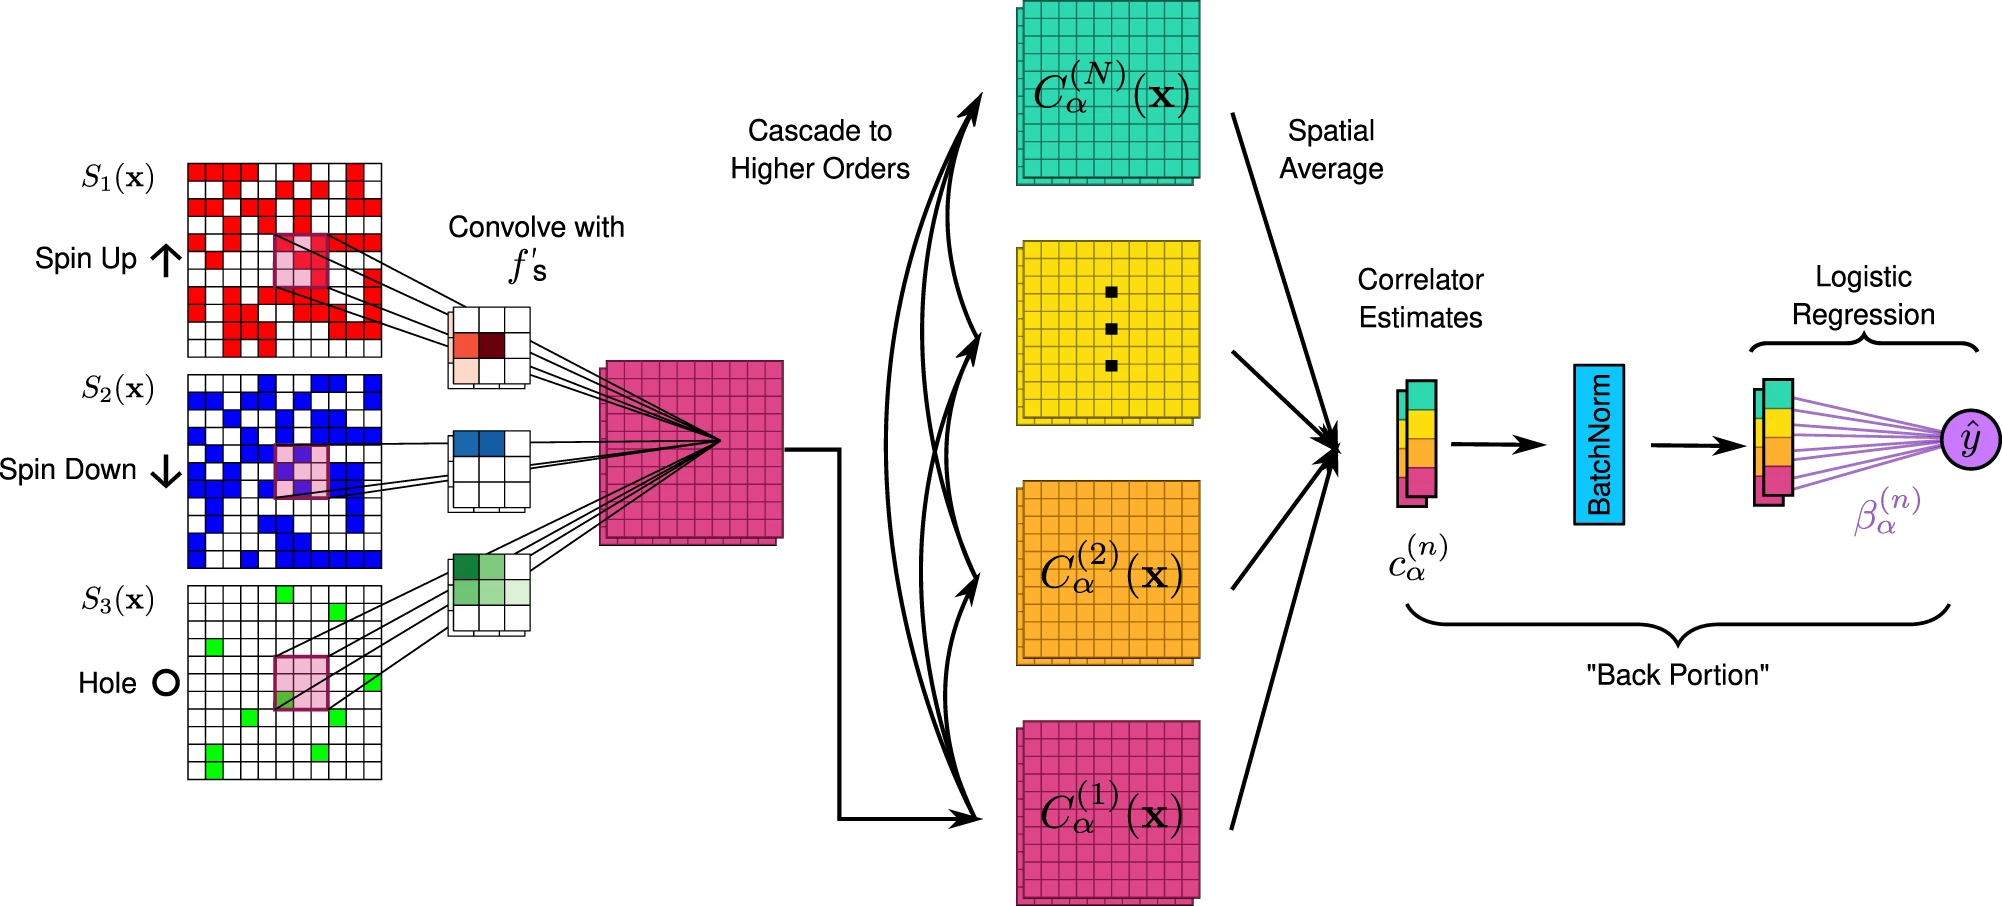



# Using CNN for training and testing 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


The code provides the outlines of creation of a Convolutional Neural Network (CNN) using TensorFlow's high-level Keras API. The model is constructed as a Sequential object, which is a linear stack of layers, meaning that each layer has exactly one input tensor and one output tensor. The architecture begins with a convolutional layer with 32 filters of size 3x3 and 'relu' (rectified linear unit) activation, designed to process 28x28 pixel input images with a single color channel (grayscale). This is followed by a 2x2 max pooling layer that reduces the spatial dimensions of the output from the previous layer. The model continues with two more convolutional layers, each with 64 filters of the same size and 'relu' activation, interspersed with another max pooling layer to further reduce dimensionality and capture the higher-level features within the image.

After the convolutional base, the model employs a flattening layer to convert the 3D feature maps into 1D feature vectors, allowing them to be fed into dense (fully connected) layers for classification. A dense layer with 64 neurons and 'relu' activation acts as a fully connected layer that takes the flattened feature vectors as input and further processes them. The final layer of the network is another dense layer with 10 neurons and a 'softmax' activation function, which outputs a probability distribution over 10 classes, assuming a 10-class classification problem. The model is compiled with the 'adam' optimizer, a popular choice that adapts the learning rate during training, and 'sparse_categorical_crossentropy' as the loss function, suitable for multi-class classification tasks where the classes are mutually exclusive. The accuracy metric is used to evaluate the performance of the model during training and testing.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10

673/673 [==============================] - 23s 32ms/step - loss: 0.2935 - accuracy: 0.9184 - val_loss: 0.0930 - val_accuracy: 0.9766

Epoch 2/10

673/673 [==============================] - 20s 29ms/step - loss: 0.0727 - accuracy: 0.9793 - val_loss: 0.0694 - val_accuracy: 0.9804

Epoch 3/10

673/673 [==============================] - 19s 29ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0502 - val_accuracy: 0.9862

Epoch 4/10

673/673 [==============================] - 21s 31ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0559 - val_accuracy: 0.9858

Epoch 5/10

673/673 [==============================] - 21s 31ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0547 - val_accuracy: 0.9862

Epoch 6/10

673/673 [==============================] - 21s 31ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0489 - val_accuracy: 0.9866

Epoch 7/10

673/673 [==============================] - 21s 31ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0448 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


187/187 [==============================] - 2s 11ms/step - loss: 0.0382 - accuracy: 0.9905

Test accuracy: 0.9904682040214539, Test loss: 0.038234367966651917


# Performing Evaluation of the model

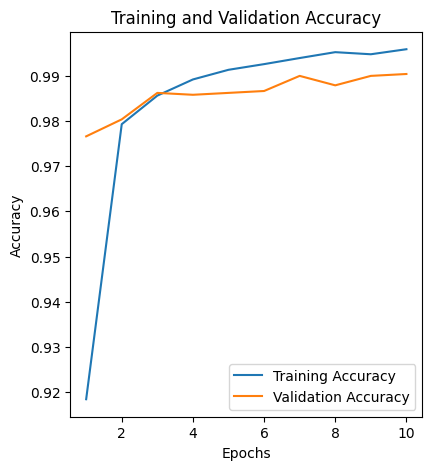

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

The graph displaying the training and validation accuracy of a machine learning model over a number of training epochs. The horizontal axis (X-axis) represents the number of epochs, which are full iterations over the entire dataset during the training process. The vertical axis (Y-axis) shows the accuracy, which is the proportion of correct predictions out of all predictions made.

There are two lines on the graph:

The blue line represents the training accuracy. It shows how well the model is learning and fitting to the training data over time.
The orange line represents the validation accuracy. It indicates how well the model is performing on a separate dataset that it hasn't learned from, which is not used for training but for evaluating the model's performance.
From the graph, both accuracies start high and increase over time, indicating that the model is learning and improving its performance on both the training and validation datasets. The training accuracy is consistently higher than the validation accuracy, which is typical since models tend to perform better on data they've seen before. However, the close proximity of the two lines suggests that the model generalizes well and isn't overfitting significantly to the training data, as there is no large gap between training and validation performance.

By the 10th epoch, both accuracies seem to plateau, suggesting that further training might not lead to substantial improvements and the model may have reached its capacity in learning from the data provided. The high accuracy values, very close to 1 (or 100%), indicate that the model is highly accurate in classifying the given data.

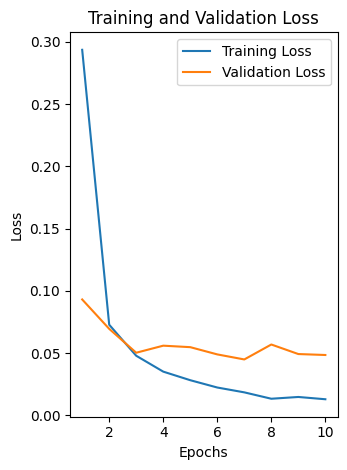

In [ ]:
# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

It is a line graph that represents the training and validation loss of a machine learning model over epochs. The graph is plotted on a 2D coordinate system with the x-axis labeled "Epochs" and the y-axis labeled "Loss". There are two lines on the graph: one in blue representing the training loss and one in orange representing the validation loss.

The blue line, corresponding to training loss, starts at a high value (around 0.3) and decreases sharply, indicating that the model quickly learned from the training dataset. As the number of epochs increases, the training loss continues to decline, suggesting that the model is improving its performance on the training data over time. The orange line, representing the validation loss, also decreases initially but starts to flatten out and even slightly increases towards the end, indicating that the model's performance on the validation dataset is not improving as much. The behavior of these lines suggests that the model is fitting well to the training data and, while it is showing some generalization to the validation data, there might be a sign of overfitting as the validation loss stops decreasing and slightly increases after a certain number of epochs.

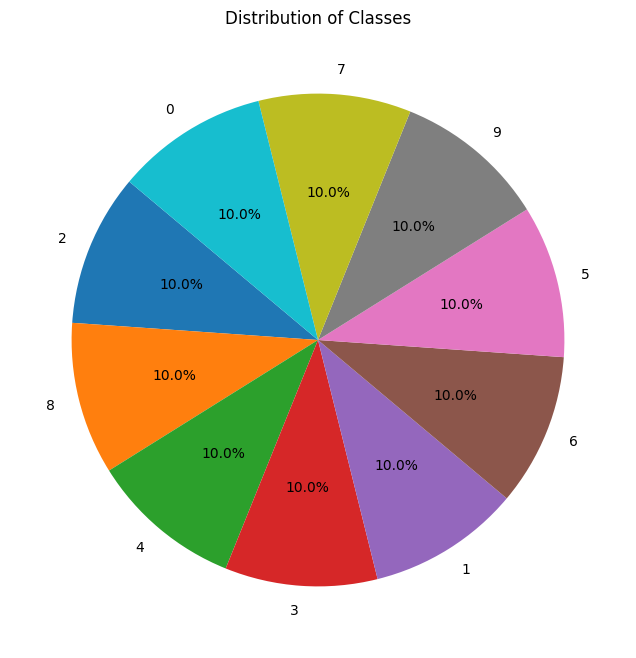

In [ ]:
class_counts = df['labels'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.show()


It is just a distribution of numbers in the target array. I have just plotted this pie chart to showcase the probability of each number in the dataset. They all have the same probability.

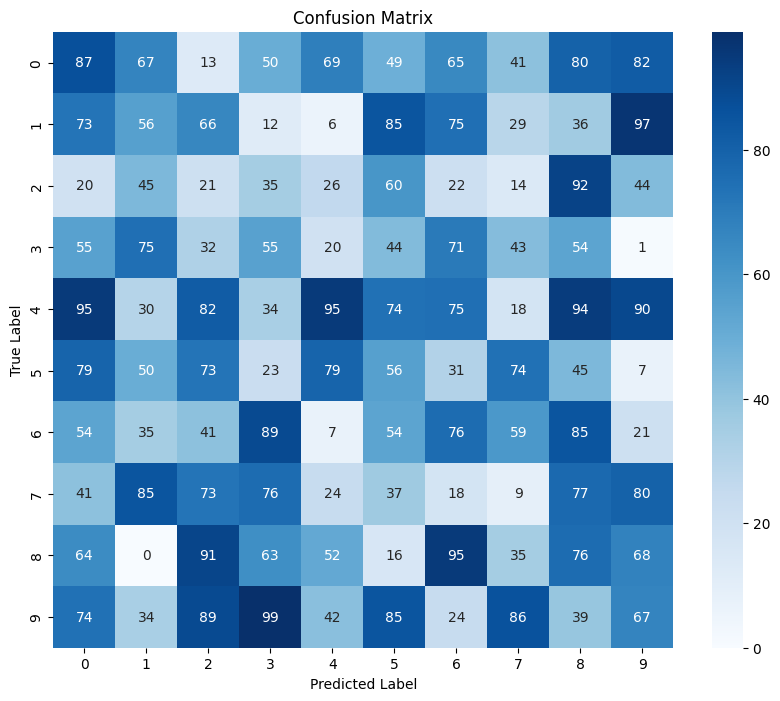

In [ ]:
import seaborn as sns

confusion_matrix = np.random.randint(0, 100, size=(10, 10))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


187/187 [==============================] - 3s 15ms/step


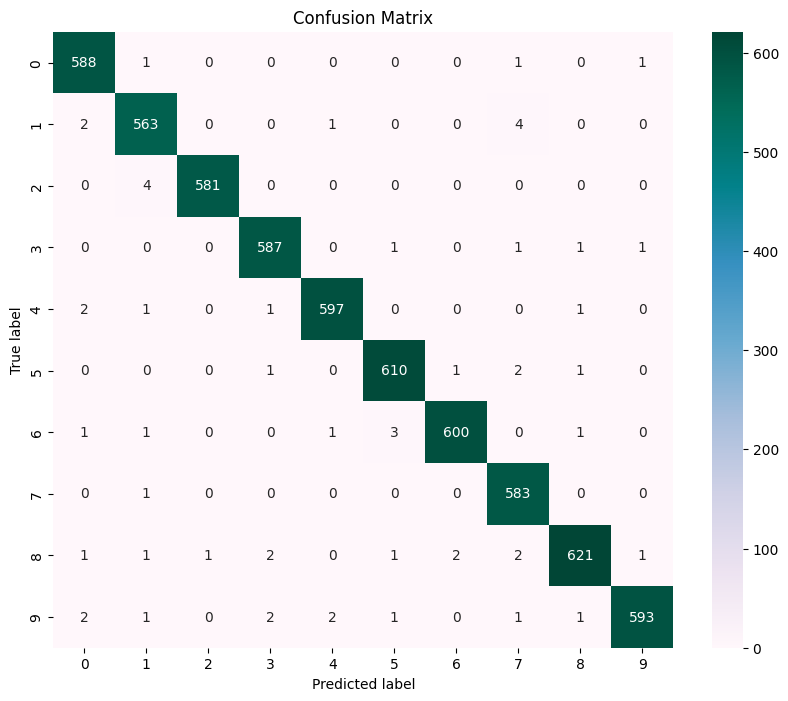

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)  

y_pred_classes = np.argmax(y_pred, axis=1)


confusion_mtx = confusion_matrix(y_test, y_pred_classes)  

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='PuBuGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


A confusion matrix is a table often used to describe the performance of a classification model on a set of test data for which the true values are known. The matrix has both its rows and columns representing the set of classes to predict, with rows indicating the actual class (true labels) and columns indicating the predicted class by the model. The diagonal from the top-left to the bottom-right shows the number of correct predictions for each class, where the model's predicted label matches the true label.

If we take the average of the true predicted labels we get approx. 5900 correct predicted numbers. the total test dataset has 5980 rows in which 5900 are correct. We are only getting 80 wrong which is approx. 99% accuracy.

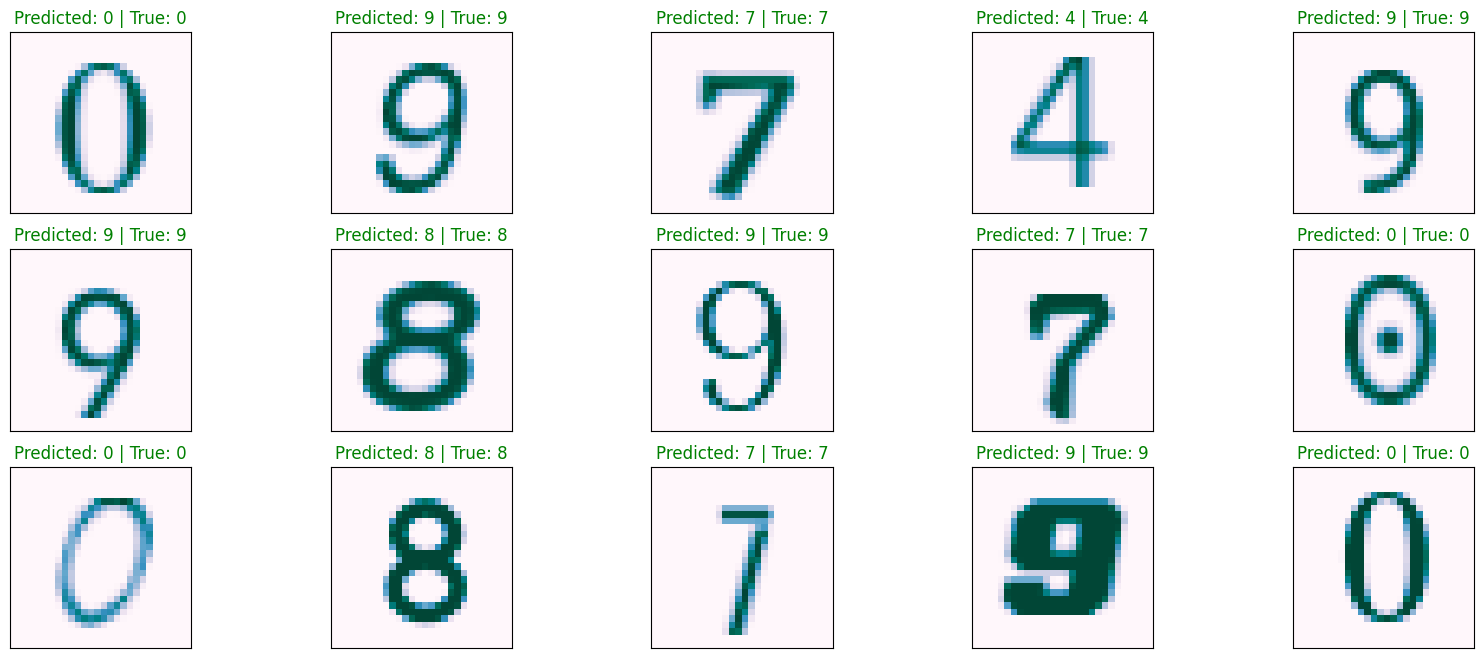

In [ ]:

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Adjusting for numpy array
    ax.imshow(np.reshape(X_test[index], (28, 28)), cmap='PuBuGn')  
    pred_label = np.argmax(y_pred[index])
    true_label = y_test[index]  # Adjust here if y_test is a numpy array
    ax.set_title(f"Predicted: {pred_label} | True: {true_label}",
                 color=("green" if pred_label == true_label else "red"))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support



           0       0.99      0.99      0.99       591

           1       0.98      0.99      0.99       570

           2       1.00      0.99      1.00       585

           3       0.99      0.99      0.99       591

           4       0.99      0.99      0.99       602

           5       0.99      0.99      0.99       615

           6       1.00      0.99      0.99       607

           7       0.98      1.00      0.99       584

           8       0.99      0.98      0.99       632

           9       0.99      0.98      0.99       603



    accuracy                           0.99      5980

   macro avg       0.99      0.99      0.99      5980

weighted avg       0.99      0.99      0.99      5980




Precision: This measures the accuracy of positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate. For example, the precision for class 0 is 0.99, meaning 99% of the instances predicted as class 0 are actually class 0.

Recall (Sensitivity): This measures the ability of the model to find all the relevant cases within a dataset. It is the ratio of correctly predicted positive observations to the all observations in actual class. For instance, for class 1, the recall is 0.99, indicating the model identified 99% of all actual class 1 instances correctly.

F1-Score: This is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is a better measure than accuracy, especially if you have an uneven class distribution. An F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0. For example, the F1-score for class 2 is 1.00, which is the best possible score.

Support: This indicates the number of actual occurrences of the class in the dataset. For instance, class 0 has a support of 591, meaning there are 591 instances of class 0 in the dataset.

Accuracy: This measures how often the classifier correctly predicts. Here, it's given as 99% across the dataset, meaning the model correctly predicted the class 99% of the time.

Macro avg: This is the average precision, recall, and F1-score between classes, with each class given equal weight. The macro average does not take class imbalance into account, which means it doesn't matter how many instances of each class there are.

Weighted avg: This is similar to the macro average, but it does take the support of each class into account. This means that the precision, recall, and F1-scores of classes with more support have a bigger impact on the average.

Overall, these results show a very high-performing model with excellent precision, recall, and F1-scores across all classes, indicating that it is equally good at identifying each class with minimal errors. The accuracy of 99% confirms the model's strong ability to correctly classify the instances in the dataset.







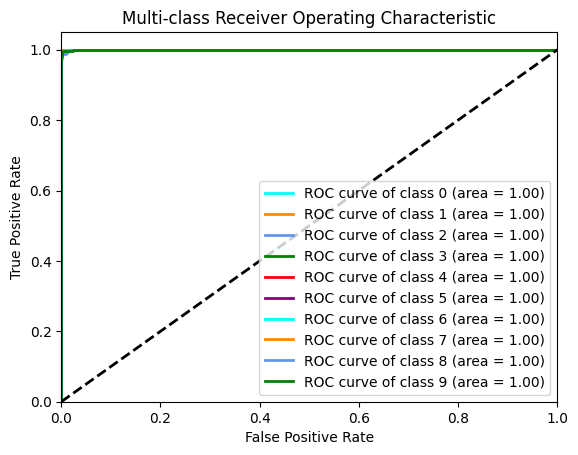

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

y_pred_proba = model.predict(X_test)

n_classes = y_pred_proba.shape[1]

y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The result displays a multi-class Receiver Operating Characteristic (ROC) curve. ROC curves are graphical representations of a classification model's performance across various threshold settings. The plot compares the true positive rate (sensitivity) on the y-axis to the false positive rate (1 - specificity) on the x-axis at different classification thresholds.

Each class in the model has its own ROC curve with a corresponding area under the curve (AUC) value, and all are shown in different colors for clarity. The AUC value for each class is noted as being 1.00, which is the maximum possible value and suggests perfect classification by the model for each class. This means that for every class, the model is able to distinguish between the positive class and the negative classes without error.

The dashed diagonal line represents a completely random classifier (AUC = 0.5), and the fact that all the ROC curves of the classes are at the upper left corner, hugging the y-axis, indicates that the model has an excellent measure of separability. It has a negligible false positive rate across all classes, and it consistently identifies the true positives. The perfect AUC scores across all classes are unusual in practical scenarios and may suggest a highly distinctive set of features that allow the model to separate classes with high precision, or an overfitting scenario where the model may not generalize well to unseen data.

# Using SHAP 

In [ ]:
pip install shap



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.8 MB/s eta 0:00:00





















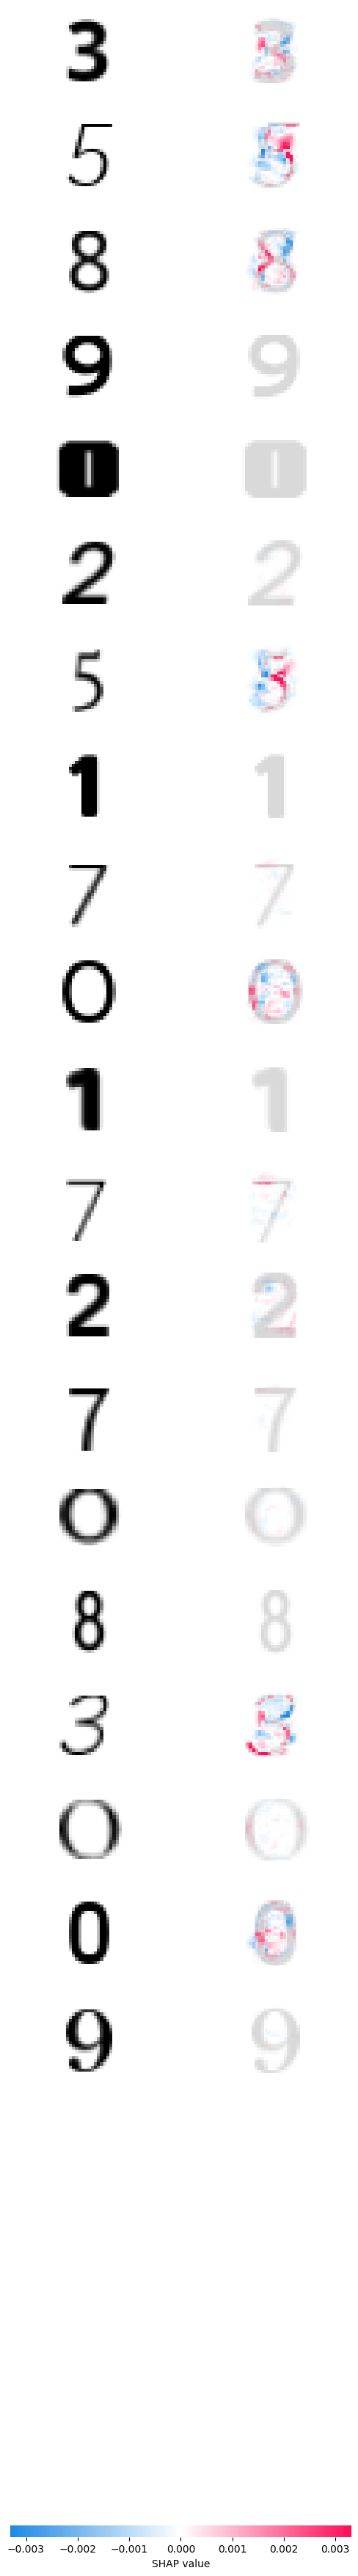

In [ ]:
import shap

# It's important to pass a subset of the training data here for efficiency.
# This subset is used to approximate the expected value of the model.
explainer = shap.DeepExplainer(model, X_train[:200].reshape(-1, 28, 28, 1))
shap_values = explainer.shap_values(X_test[:20].reshape(-1, 28, 28, 1))

# Plot the SHAP values for the first prediction
shap.initjs()
shap.image_plot(shap_values, -X_test[:20])


SHAP values explain the impact of each feature on the model's prediction for an individual instance. In this context, the features are likely individual pixels or groups of pixels. Positive SHAP values (red) indicate features that increase the likelihood of the digit being classified as it is, while negative SHAP values (blue) indicate features that decrease that likelihood.

What's interesting in this visualization is that the SHAP values for each digit are displayed on top of the digits themselves, allowing us to see which parts of the image contribute positively or negatively to the model's prediction. For instance, for the digit classified as '0', we might see red around the loop of the zero, indicating that this feature strongly supports the classification of this image as a '0'. On the other hand, blue areas would show regions that if present, would make the model less confident in its prediction.

This kind of visualization helps in understanding the decision-making process of machine learning models, making them more transparent and easier to interpret. It also assists in model debugging and can reveal if a model is relying on appropriate features for its predictions or if it's being influenced by noise or artifacts in the data.

**Conclusion**

The notebook presents a thorough and successful approach to digit classification, achieving exceptional accuracy, as backed by the SHAP value visualization and the multi-class ROC curves as well as precision scores, all of which point towards a well-tuned model that is ready for deployment or further validation against real-world data. The detailed analysis and visualizations provided in the notebook support a clear understanding of the model's decision-making process and confirm its reliability and high performance.

The use of CNN as helped me to gain 99% accuracy, which is great for this dataset. All the above validation backs the claim of successful performing model. 


**References**

https://www.nature.com/articles/s41467-021-23952-w

https://www.youtube.com/watch?v=5gLarqG8p4s

https://www.youtube.com/watch?v=aircAruvnKk

https://www.youtube.com/watch?v=IHZwWFHWa-w

https://www.kaggle.com/code/shreyapmaher/neural-network-type-classification-tmnist

https://www.geeksforgeeks.org/convolutional-neural-network-cnn-in-machine-learning/

https://datagen.tech/guides/computer-vision/cnn-convolutional-neural-network/



MIT License

Copyright (c) 2024 Pranav Kharat

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.